# PLANE PRICE - EDA & VISUALIZATION # 

### STEP 1 _Import librairies_ ###

In [50]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### _Import dataset_ ###

In [51]:
Plane_price=pd.read_csv("Plane Price.csv")

In [52]:
Plane_price.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


### _Show dataset main statistics_ ###

In [53]:
display(Plane_price.describe(include='all'))

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
count,517,517,517,497,507.000000,502.000000,517.000000,513,491.000000,492.000000,517,516,517,517,499,5.070000e+02
unique,284,4,117,209,NaN,NaN,NaN,264,NaN,NaN,213,428,183,136,299,NaN
top,100 Darter (S.L. Industries),Piston,285,148,NaN,NaN,NaN,"1,250",NaN,NaN,"3,600","1,525",25/1,35/10,550,NaN
freq,234,384,37,10,NaN,NaN,NaN,13,NaN,NaN,16,5,17,34,9,NaN
mean,NaN,NaN,NaN,NaN,200.792899,60.795817,1419.379110,NaN,2065.126273,1743.306911,NaN,NaN,NaN,NaN,NaN,2.362673e+06
std,NaN,NaN,NaN,NaN,104.280532,16.657002,4278.320773,NaN,1150.031899,730.009674,NaN,NaN,NaN,NaN,NaN,1.018731e+06
min,NaN,NaN,NaN,NaN,70.000000,27.000000,12.000000,NaN,457.000000,500.000000,NaN,NaN,NaN,NaN,NaN,6.500000e+05
25%,NaN,NaN,NaN,NaN,130.000000,50.000000,50.000000,NaN,1350.000000,1265.000000,NaN,NaN,NaN,NaN,NaN,1.600000e+06
50%,NaN,NaN,NaN,NaN,169.000000,56.000000,89.000000,NaN,1706.000000,1525.000000,NaN,NaN,NaN,NaN,NaN,2.000000e+06
75%,NaN,NaN,NaN,NaN,232.000000,73.000000,335.000000,NaN,2357.000000,2145.750000,NaN,NaN,NaN,NaN,NaN,2.950000e+06


### STEP 2 - EDA & VIsualization ###

#### _On vérifie les valeurs manquantes_ ####

In [54]:
Plane_price.isna().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [55]:
Plane_price.isnull().any()

Model Name                 False
Engine Type                False
HP or lbs thr ea engine    False
Max speed Knots             True
Rcmnd cruise Knots          True
Stall Knots dirty           True
Fuel gal/lbs               False
All eng rate of climb       True
Eng out rate of climb       True
Takeoff over 50ft           True
Landing over 50ft          False
Empty weight lbs            True
Length ft/in               False
Wing span ft/in            False
Range N.M.                  True
Price                       True
dtype: bool

In [56]:
Plane_price.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

#### _On vérifie le type de données dans nos colonnes_ ####

In [58]:
Plane_price.dtypes

Model Name                  object
Engine Type                 object
HP or lbs thr ea engine     object
Max speed Knots             object
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb       object
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft           object
Empty weight lbs            object
Length ft/in                object
Wing span ft/in             object
Range N.M.                  object
Price                      float64
dtype: object

#### _On convertit les colonnes "Object" en "Float"_ ####

In [59]:
cols = ["Max speed Knots", "Range N.M.", "All eng rate of climb", "Empty weight lbs"]
Plane_price[cols] = (Plane_price[cols]
            .replace(r"[^\d.-]", "", regex=True)   # garde chiffres enlève le reste
            .apply(pd.to_numeric, errors="coerce"))  # en float non convertibles -> NaN
Plane_price[cols] = Plane_price[cols].fillna(Plane_price[cols].median())
print(Plane_price[cols].dtypes)
print(Plane_price[cols].isna().sum())


Max speed Knots          float64
Range N.M.               float64
All eng rate of climb    float64
Empty weight lbs         float64
dtype: object
Max speed Knots          0
Range N.M.               0
All eng rate of climb    0
Empty weight lbs         0
dtype: int64


#### _On remplace les valeurs manquantes dans les colonnes concernées par la valeur médiane_ ####

In [60]:
Plane_price['Max speed Knots'] = Plane_price['Max speed Knots'].fillna(Plane_price['Max speed Knots'].median())
Plane_price['Stall Knots dirty'] = Plane_price['Stall Knots dirty'].fillna(Plane_price['Stall Knots dirty'].median())
Plane_price['All eng rate of climb'] = Plane_price['All eng rate of climb'].fillna(Plane_price['All eng rate of climb'].median())
Plane_price['Eng out rate of climb'] = Plane_price['Eng out rate of climb'].fillna(Plane_price['Eng out rate of climb'].median())
Plane_price['Takeoff over 50ft'] = Plane_price['Takeoff over 50ft'].fillna(Plane_price['Takeoff over 50ft'].median())
Plane_price['Empty weight lbs'] = Plane_price['Empty weight lbs'].fillna(Plane_price['Empty weight lbs'].median())
Plane_price['Range N.M.'] = Plane_price['Range N.M.'].fillna(Plane_price['Range N.M.'].median())
Plane_price['Price'] = Plane_price['Price'].fillna(Plane_price['Price'].median())
Plane_price['Rcmnd cruise Knots'] = Plane_price['Rcmnd cruise Knots'].fillna(Plane_price['Rcmnd cruise Knots'].median())

#### _Visualisation des valeurs de la colonne 'Engine Type'_ ####

In [61]:
Plane_price['Engine Type'].unique()


array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [62]:
# Nous détectons 2 écritures possibles pour "piston" et nous devons les regrouper pour ne pas fausser le résultat # 

Plane_price['Engine Type'] = Plane_price ['Engine Type'].str.title()
Plane_price['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

#### _On enregistre la Data "cleaned"_ ####

In [63]:
Plane_price_clean=Plane_price.copy()

In [64]:
Plane_price_clean.to_csv('Plane_price_clean', index=False)

#### _Création d'une boite à moustache pour visualiser la distribution la distribution de la colonne 'Prix'_ ####

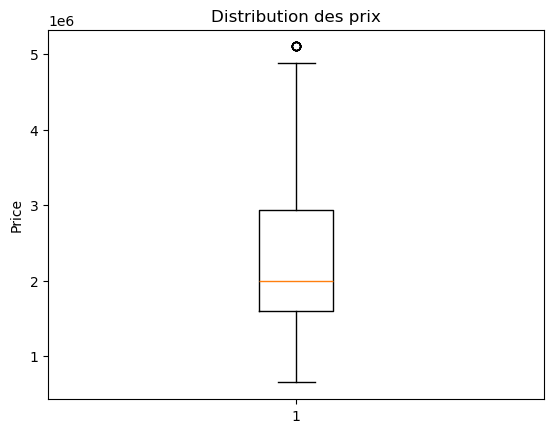

In [65]:
# Créer un bloxplot de la colonne 'Price' # 
plt.boxplot(Plane_price_clean['Price'])
# Ajouter un titre et des labels #
plt.title('Distribution des prix')
plt.ylabel('Price')
plt.show()

In [66]:
# On a 1 seule valeur en "Outlier" #
# Calcul de l'IQR (intervalle interquartile)
Q1 = Plane_price_clean['Price'].quantile(0.25)
Q3 = Plane_price_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

In [67]:
# Définir les limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [68]:
# Trouver les outliers
outliers = Plane_price_clean[(Plane_price_clean['Price'] < lower_limit) | (Plane_price_clean['Price'] > upper_limit)]
print("Outliers détectés :")
print(outliers)

Outliers détectés :
                                  Model Name Engine Type  \
152                   402C Business Liner II         Jet   
153                      402,-A turbocharged         Jet   
162  T 337 G-P II,H-P, Skymaster pressurized         Jet   
174                          208 Caravan-675         Jet   
175             100 Darter (S.L. Industries)         Jet   
176             100 Darter (S.L. Industries)         Jet   
177     T 210 K,L Turbo (K=9 mph less speed)         Jet   
178             100 Darter (S.L. Industries)         Jet   
422              PA-30 B Turbo Twin Comanche         Jet   

    HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
152                   3,700           455.00               417.0   
153                   3,700           457.00               169.0   
162                   2,950           464.00               459.0   
174                   6,400             0.92               511.0   
175                   4,000            

In [69]:
len(outliers)

9

### _Visualisation_ Price & Engine Type ###

C:\Users\steph\AppData\Local\Temp\ipykernel_21308\759162382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.catplot(Plane_price_clean, x='Engine Type', y='Price', kind= 'bar', palette= 'pastel');


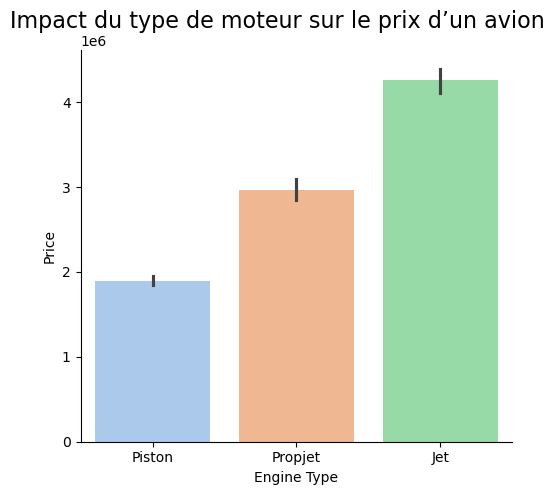

In [70]:
plot=sns.catplot(Plane_price_clean, x='Engine Type', y='Price', kind= 'bar', palette= 'pastel');
plot.fig.suptitle("Impact du type de moteur sur le prix d’un avion", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

C:\Users\steph\AppData\Local\Temp\ipykernel_21308\4146433108.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(Plane_price_clean, x='Price', y='Engine Type', kind='box', palette="pastel");


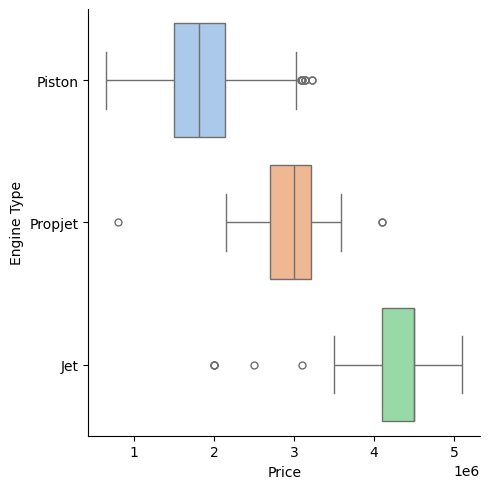

In [71]:
sns.catplot(Plane_price_clean, x='Price', y='Engine Type', kind='box', palette="pastel");

C:\Users\steph\AppData\Local\Temp\ipykernel_21308\1377663812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(Plane_price_clean, kind='box', x='Engine Type', y='Price', palette="bright");


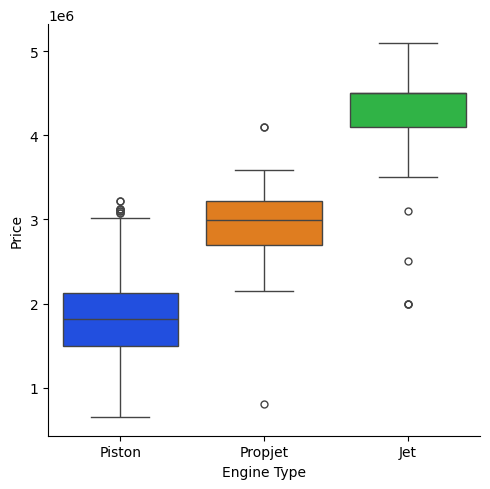

In [72]:
sns.catplot(Plane_price_clean, kind='box', x='Engine Type', y='Price', palette="bright");

#### _Visualisation Horsepower & Price_ ####

In [73]:
print(Plane_price_clean.head())
print(Plane_price_clean.columns)

                     Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

   Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0            104.0                91.0               46.0            36   
1             89.0                83.0               44.0            15   
2             90.0                78.0               37.0            19   
3             88.0                78.0               37.0            19   
4             83.0                74.0               33.0            14   

   All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                  450.0                  900.0     

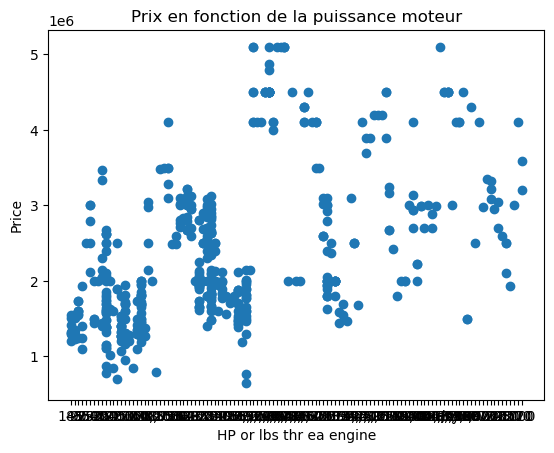

In [74]:
plt.scatter(Plane_price_clean['HP or lbs thr ea engine'], Plane_price_clean['Price'])
plt.xlabel('HP or lbs thr ea engine')
plt.ylabel('Price')
plt.title('Prix en fonction de la puissance moteur')
plt.show()

### _Max speed Knots & Price_ ###

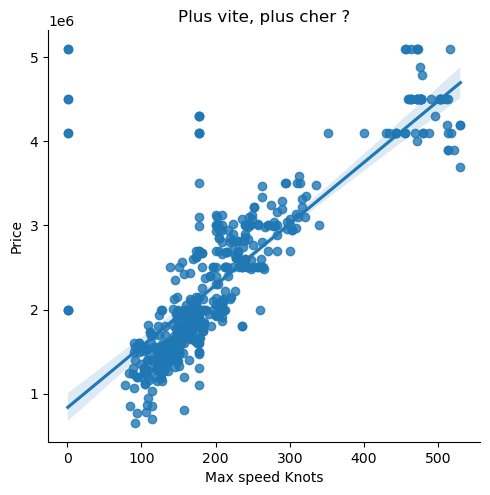

In [75]:
sns.lmplot(x='Max speed Knots', y='Price', data=Plane_price_clean)
plt.title('Plus vite, plus cher ?')
plt.show()

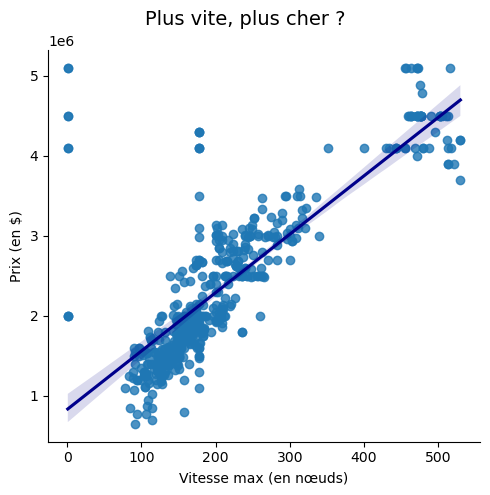

In [76]:
plot = sns.lmplot(x='Max speed Knots', y='Price', data=Plane_price_clean, line_kws={'color': 'darkblue'})
plot.fig.suptitle('Plus vite, plus cher ?', fontsize=14)
plot.fig.subplots_adjust(top=0.9)
plot.set_axis_labels("Vitesse max (en nœuds)", "Prix (en $)")
plt.show()

In [77]:
# Sur ce graphique, on voit clairement quelques valeurs aberrantes du côté gauche, notamment des avions avec une vitesse max proche de 0 ou très faible, ce qui est peu réaliste.
Plane_price_clean_filtered = Plane_price_clean[Plane_price_clean['Max speed Knots'] >= 50]

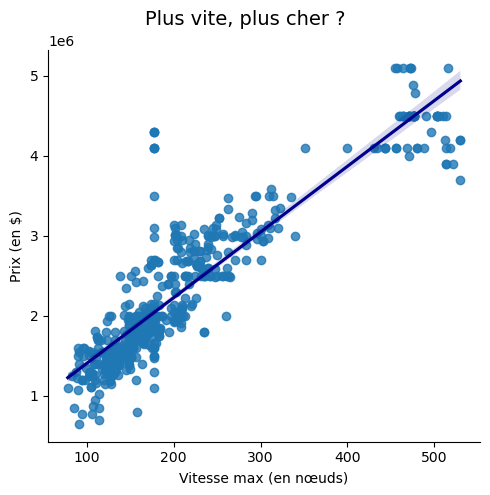

In [78]:
plot = sns.lmplot(x='Max speed Knots', y='Price', data=Plane_price_clean_filtered,line_kws={'color': 'darkblue'})
plot.fig.suptitle('Plus vite, plus cher ?', fontsize=14)
plot.fig.subplots_adjust(top=0.9)
plot.set_axis_labels("Vitesse max (en nœuds)", "Prix (en $)")
plt.show()

### _Empty weight lbs & Price_ ###

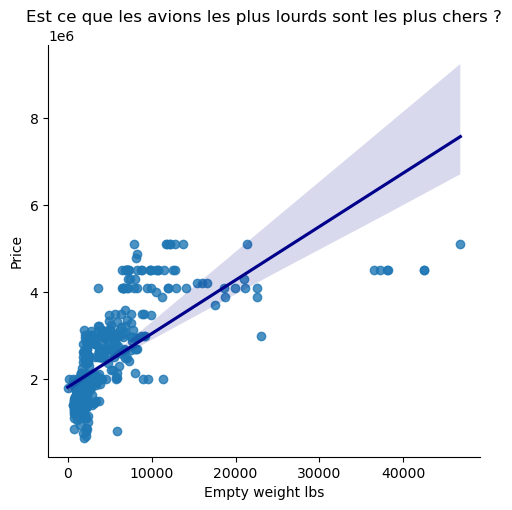

In [88]:
sns.lmplot(x='Empty weight lbs', y='Price', data=Plane_price_clean, line_kws={'color': 'darkblue'})
plt.title('Est ce que les avions les plus lourds sont les plus chers ?')
plt.show()

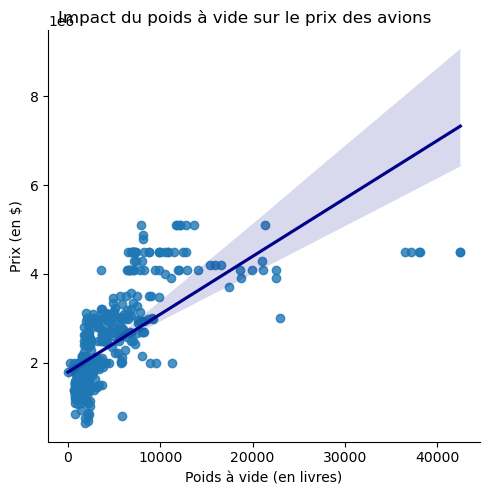

In [101]:
plot = sns.lmplot(x='Empty weight lbs', y='Price', data=Plane_price_clean_filtered,line_kws={'color': 'darkblue'})
plot.fig.suptitle('Impact du poids à vide sur le prix des avions')
plot.set_axis_labels("Poids à vide (en livres)", "Prix (en $)")
plt.show()

### _Max speed Knots & Price selon Engine Type_ ###

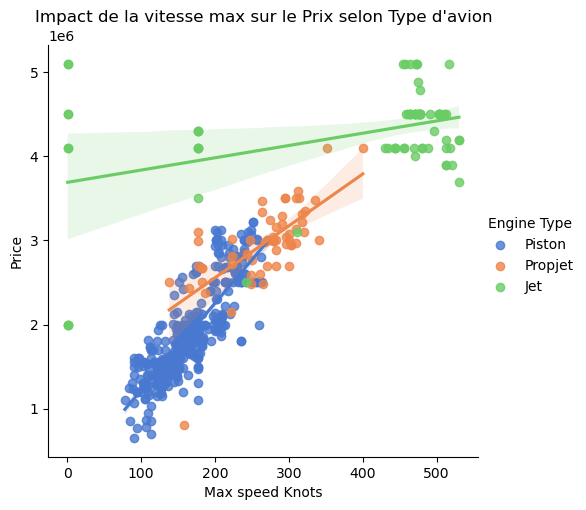

In [80]:
sns.lmplot(x='Max speed Knots', y='Price', hue='Engine Type', data=Plane_price_clean, palette='muted')
plt.title("Impact de la vitesse max sur le Prix selon Type d'avion")
plt.show()

In [103]:
# Sur ce graphique, on voit clairement quelques valeurs aberrantes du côté gauche, notamment des avions avec une vitesse max proche de 0 ou très faible, ce qui est peu réaliste.
Plane_price_clean_filtered = Plane_price_clean[Plane_price_clean['Max speed Knots'] >= 50]

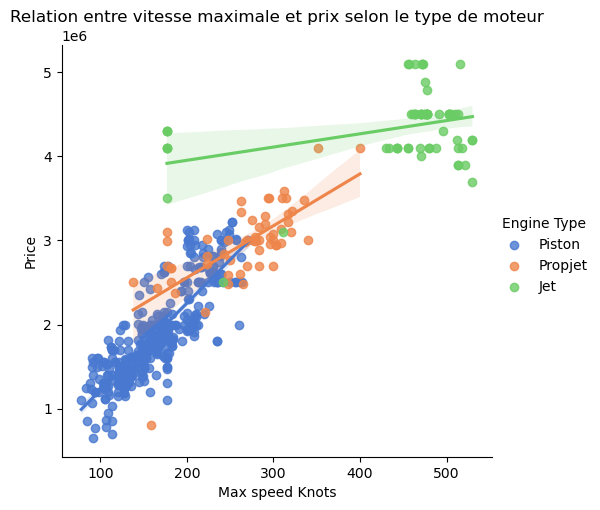

In [104]:
sns.lmplot(x='Max speed Knots', y='Price', hue='Engine Type', data=Plane_price_clean_filtered, palette='muted')
plt.title("Relation entre vitesse maximale et prix selon le type de moteur")
plt.show()

### _Range N.M. & Price_ ###

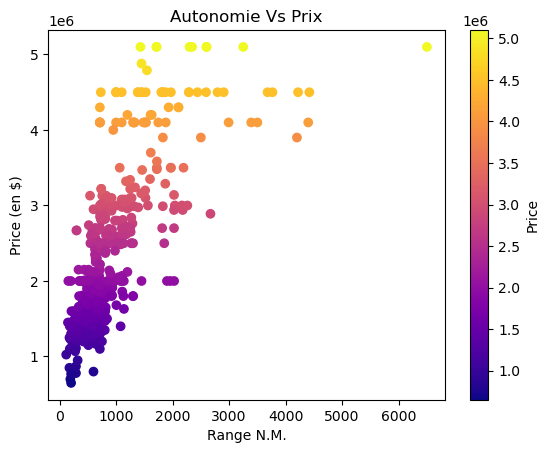

In [109]:
plt.scatter(Plane_price_clean['Range N.M.'], Plane_price_clean['Price'], 
            c=Plane_price_clean['Price'], cmap='plasma')
plt.title("Autonomie Vs Prix")
plt.xlabel("Range N.M.")
plt.ylabel("Price (en $)")
plt.colorbar(label='Price')  # affiche la légende des couleurs
plt.show()

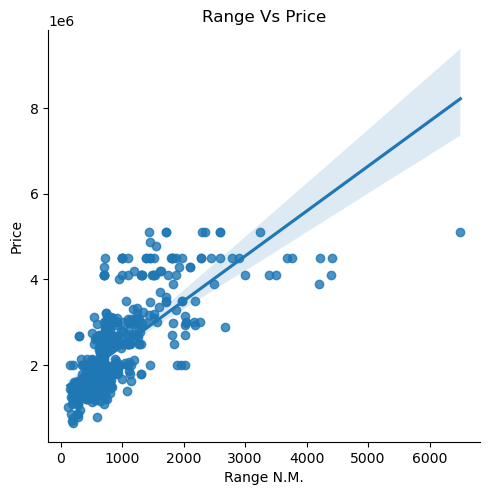

In [84]:
sns.lmplot(x='Range N.M.', y='Price', data=Plane_price_clean)
plt.title('Range Vs Price')
plt.show()

In [110]:
# Filtrer pour exclure la valeur aberrante 
Plane_price_clean_filtered = Plane_price_clean[Plane_price_clean['Range N.M.'] <= 5_000]


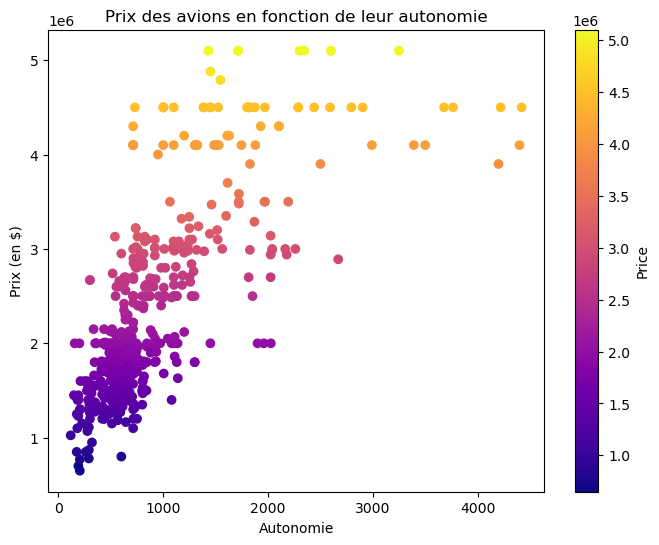

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(Plane_price_clean_filtered['Range N.M.'], Plane_price_clean_filtered['Price'], 
            c=Plane_price_clean_filtered['Price'], cmap='plasma')
plt.title("Prix des avions en fonction de leur autonomie")
plt.xlabel("Autonomie")
plt.ylabel("Prix (en $)")
plt.colorbar(label='Price')  # affiche la légende des couleurs
plt.show()

#### _Rcmnd cruise Knots & Price_ ###

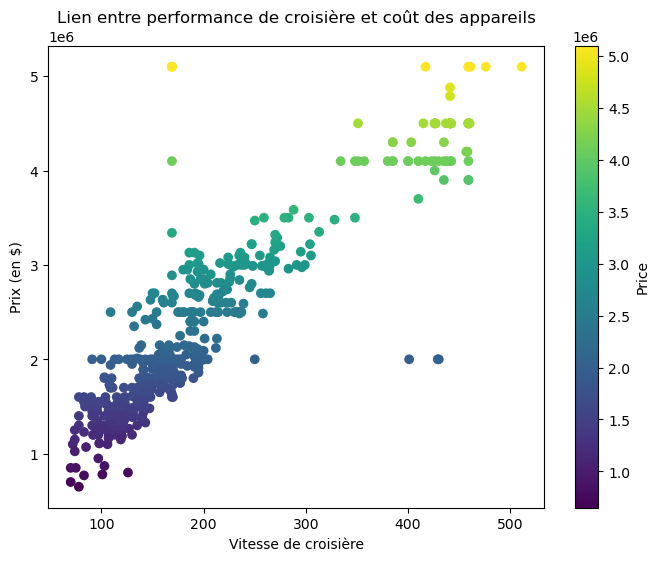

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(Plane_price_clean['Rcmnd cruise Knots'], Plane_price_clean['Price'], 
            c=Plane_price_clean['Price'], cmap='viridis')
plt.title("Lien entre performance de croisière et coût des appareils")
plt.xlabel("Vitesse de croisière")
plt.ylabel("Prix (en $)")
plt.colorbar(label='Price')  # affiche la légende des couleurs
plt.show()